<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/PCA/01_reduccion_componentes_principales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import warnings

# **Info**
---

Tasa de mortalidad cruda por tipo de cáncer, por 100.000 personas-año, en ambos sexos, edades [0 - 80+], por departamento, periodo 1997 a 2019.

Propósito: Aplicar componentes principales, para reducir la dimensionalidad.

path data: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Tasa-de-mortalidad-por-tipo-de-c-ncer/64it-izw2

Suministró los datos: Departamento Administrativo Nacional de Estadística DANE



#**Diccionario Datos**
---
- Tipo de Cáncer: Tipo de cancer.
- Localización: Lugar del evento.
- 1997 - 2019: Tasa de mortalidad cruda por 100.000 personas-año, en ambos sexos, edades [0 - 80+]




# **Funciones**
---


In [2]:
def componentes_principales(data:object,
                            min_explained_variance:int=0.85,
                            min_component:int=3,
                            **kwards)->tuple:
  """simple method of PCA, that return data transform"""
  final_comp = 0
  for comp in range(min_component, data.shape[1]):
    pca = PCA(n_components=comp, **kwards)
    pca.fit(data)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() >= min_explained_variance:
      break

  final_pca = PCA(n_components=final_comp, **kwards)
  final_pca.fit(data)
  data_df = final_pca.transform(data)
  info = "Using {} components, we can explain {}% of the variability\
  in the original data.".format(final_comp,comp_check.sum())

  return data_df, final_pca, info

# **Config**
---



In [3]:
sns.set(style="darkgrid")
pd.set_option('display.float_format', '{:,.2f}'.format)
warnings.simplefilter("ignore")
title_data = 'Tasa de mortalidad por tipo de cáncer'
paleta = sns.color_palette("tab10").as_hex()

In [4]:
# Data de los pagos
url='https://drive.google.com/file/d/17P0-QV3ypl04BLOaUoZkt6plUDUvO3Cg/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url, dtype=str)

In [5]:
data

,Tipo de Cáncer,Localización,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Mama,Risaralda,9.1,9.6,9.3,9.5,10.7,10.2,10.6,11,...,13.2,13.3,14.9,16.1,16.4,17.4,19,18.8,18.8,19.6
1,Mama,Atlántico,8.5,8.7,8.8,8.9,9.4,9.7,10.2,10.4,...,12.4,12.9,13.7,14.4,15.8,16.6,17.5,18.4,18.9,19.4
2,Mama,Valle del Cauca,10.1,10.5,11,11.6,12.2,12.6,12.6,12.8,...,13.6,13.9,14.6,15.1,16,16.8,18,18.3,18.7,18.9
3,Estómago,Quindio,15.7,15.7,15,14.3,14.4,14.4,15.1,15.5,...,19.6,20,19.6,18.4,18.3,18.1,18.2,18.9,19.3,18.6
4,Mama,Santander,7.6,7.6,7.6,8.4,8.7,9.2,9.2,9.5,...,10,10.8,11.4,12.2,13.1,14.6,15.7,16.3,16.9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,Orofaringe,"Archipiélago de San Andrés, Providencia",1.5,1.5,1.5,1.5,1.5,1.5,1.4,1.4,...,0,0,0,0,0,0,0,0,0,NaN
1815,Orofaringe,Vichada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1816,Orofaringe,Guainía,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1817,Orofaringe,Guaviare,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


**info**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tipo de Cáncer  1819 non-null   object
 1   Localización    1819 non-null   object
 2   1997            1819 non-null   object
 3   1998            1819 non-null   object
 4   1999            1819 non-null   object
 5   2000            1819 non-null   object
 6   2001            1819 non-null   object
 7   2002            1819 non-null   object
 8   2003            1819 non-null   object
 9   2004            1819 non-null   object
 10  2005            1819 non-null   object
 11  2006            1819 non-null   object
 12  2007            1819 non-null   object
 13  2008            1819 non-null   object
 14  2009            1819 non-null   object
 15  2010            1819 non-null   object
 16  2011            1819 non-null   object
 17  2012            1819 non-null   object
 18  2013    

- Para el año 2019 se presentan valores nulos

In [7]:
len(data['Tipo de Cáncer'].unique()), len(data['Localización'].unique())

(55, 38)

- Se presentan 55 tipos de cánceres
- La localización incluye 38 localizaciones entre departamentos, la capital y las zonas insulares.

In [8]:
(data['2019'].isnull().sum() / data.shape[0]) * 100

0.7146783947223749

- El 0.7% de valores nulos en la columna 2019

**Inputación de valores nulos**


In [9]:
data['2019'] = data['2019'].fillna(0)

Por cuestiones del ejercicio y de su propósito se opta en no agrupar por el tipo de cáncer o el departamento, ni pivotar. La idea es reducir la dimensión del conjunto de datos en unos cuantos componentes que capturen la mayoría de la información del conjunto de datos.

# **data split**

---



In [10]:
X_data = data.iloc[:, 2:]

In [11]:
data_df, final_pca, info = componentes_principales(
    X_data,
    min_explained_variance=0.85,
    min_component=3)

In [12]:
info

'Using 3 components, we can explain 0.983914584771233% of the variability  in the original data.'

In [13]:
final_pca.n_components

3

In [14]:
def scree_plot(
    final_pca:object,
    paleta,
    size:tuple=(10,5),
    title:str='Scree Plot'
    )->None:
  """Permite visualizar la varianza de cada componente"""
  number_components = final_pca.n_components
  principal_components = [f'PC{i+1}' for i in range(number_components)]
  explained_variance = final_pca.explained_variance_ratio_
  cumulative_variance = np.cumsum(explained_variance)
  plt.figure(figsize = size)
  plt.bar(principal_components, explained_variance, color=paleta[0])
  plt.plot(
      principal_components,
      cumulative_variance,
      'o-',
      linewidth=2,
      color=paleta[1])

  for i,j in zip(principal_components, cumulative_variance):
    plt.annotate(str(round(j,2)), xy=(i, j))
  plt.title(title)
  plt.xlabel('Principal Components')
  plt.ylabel('Explained Variance')
  plt.show()



In [15]:
scree_plot.__doc__

'Permite visualizar la varianza de cada componente'

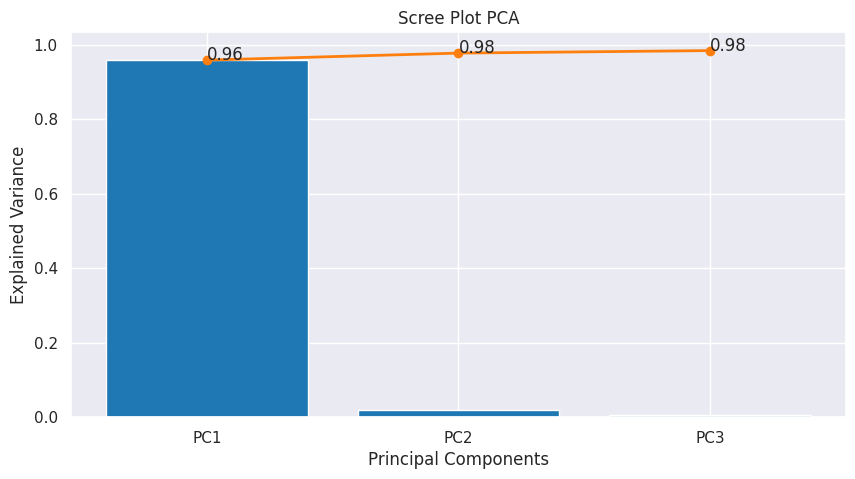

In [16]:
scree_plot(final_pca, paleta, title='Scree Plot PCA')

Se aprecia que el primer componente PC1 explica la mayor parte de la varianza del conjunto de datos original.

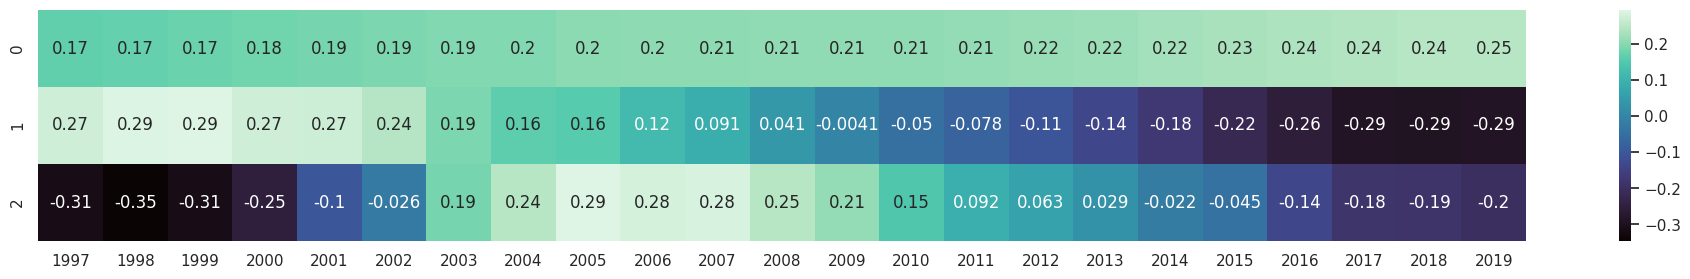

In [17]:
pca_components = pd.DataFrame(final_pca.components_, columns = X_data.columns)
customPalette = sns.color_palette("mako", as_cmap=True)
plt.figure(figsize=(24,3))
sns.heatmap(pca_components, cmap=customPalette, annot=True)
plt.show()

- Se observa que las características se encuentra al tamente correlacionadas con el primer componente en comparación con el resto de componentes
- Además, puede observar que algunas funciones están directamente correlacionadas entre sí y PCA aporta el beneficio adicional de eliminar la multicolinealidad entre estas funciones.